In [1]:
import os
import sys
sys.path.append("..")
from thinkdsp import decorate,Wave,Spectrum
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
nrows = 100
ncols = 5

array = np.empty((nrows, ncols))
array.fill(np.nan)
array[0, :] = np.random.random(ncols)
array[:, 0] = np.random.random(nrows)
array[0:6]

array([[0.63086305, 0.73923058, 0.31155745, 0.45668203, 0.8798743 ],
       [0.41913389,        nan,        nan,        nan,        nan],
       [0.4239996 ,        nan,        nan,        nan,        nan],
       [0.74853325,        nan,        nan,        nan,        nan],
       [0.93391995,        nan,        nan,        nan,        nan],
       [0.06252637,        nan,        nan,        nan,        nan]])

In [3]:
p = 0.5
n = nrows
cols = np.random.geometric(p, n)
cols[cols >= ncols] = 0
cols

array([2, 1, 4, 3, 1, 1, 3, 1, 4, 1, 4, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 0,
       3, 1, 1, 1, 3, 1, 1, 3, 2, 1, 0, 3, 1, 1, 1, 2, 3, 1, 2, 2, 2, 3,
       1, 1, 0, 2, 3, 2, 2, 1, 1, 2, 2, 1, 2, 4, 1, 1, 1, 4, 2, 1, 2, 1,
       3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 3, 4, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 4, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1])

In [4]:
rows = np.random.randint(nrows, size=n)
rows

array([58, 15, 86, 38,  3, 46, 48, 20, 26, 11, 35, 89, 12, 50, 45, 83, 70,
       22, 79,  4, 86, 80,  9, 75, 93, 32, 11, 73,  2,  8, 24, 91, 57, 37,
       68, 90, 71, 43, 91, 51, 26, 96, 54, 69,  6, 70, 88,  4, 38, 52, 58,
       45, 57, 32, 47, 34, 28, 31, 93, 15, 70, 30,  4,  2, 67, 69, 54, 62,
       91, 65, 53, 87, 20, 64, 15, 96, 34, 71, 61, 62, 40, 58, 58, 99, 41,
       62, 70, 56, 71, 70, 34, 93, 34, 98, 85, 75, 98, 28, 23, 40])

In [5]:
array[rows, cols] = np.random.random(n)
array[0:6]

array([[0.63086305, 0.73923058, 0.31155745, 0.45668203, 0.8798743 ],
       [0.41913389,        nan,        nan,        nan,        nan],
       [0.4239996 , 0.63755324,        nan,        nan,        nan],
       [0.74853325, 0.2499002 ,        nan,        nan,        nan],
       [0.93391995, 0.64449282, 0.02152573,        nan,        nan],
       [0.06252637,        nan,        nan,        nan,        nan]])

In [6]:
df = pd.DataFrame(array)
df.head()

,0,1,2,3,4
0,0.630863,0.739231,0.311557,0.456682,0.879874
1,0.419134,NaN,NaN,NaN,NaN
2,0.424000,0.637553,NaN,NaN,NaN
3,0.748533,0.249900,NaN,NaN,NaN
4,0.933920,0.644493,0.021526,NaN,NaN


In [7]:
filled = df.fillna(method='ffill', axis=0)
filled.head()

C:\Users\cbes1\AppData\Local\Temp\ipykernel_24652\4257750832.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled = df.fillna(method='ffill', axis=0)


,0,1,2,3,4
0,0.630863,0.739231,0.311557,0.456682,0.879874
1,0.419134,0.739231,0.311557,0.456682,0.879874
2,0.424000,0.637553,0.311557,0.456682,0.879874
3,0.748533,0.249900,0.311557,0.456682,0.879874
4,0.933920,0.644493,0.021526,0.456682,0.879874


In [8]:
total = filled.sum(axis=1)
total.head()

0    3.018207
1    2.806478
2    2.709667
3    2.646547
4    2.936495
dtype: float64

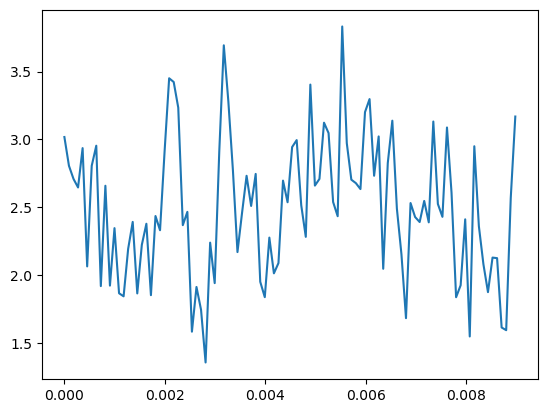

In [9]:
wave = Wave(total.values)
wave.plot()

In [10]:
def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.
    
    nrows: number of values to generate
    rcols: number of random sources to add
    
    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

In [11]:
ys = voss(11025)
ys

C:\Users\cbes1\AppData\Local\Temp\ipykernel_24652\3490760828.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=0, inplace=True)


array([8.15434779, 8.0971179 , 8.68989623, ..., 7.65055347, 7.30018777,
       8.0223314 ])

In [12]:
wave = Wave(ys)
wave.unbias()
wave.normalize()

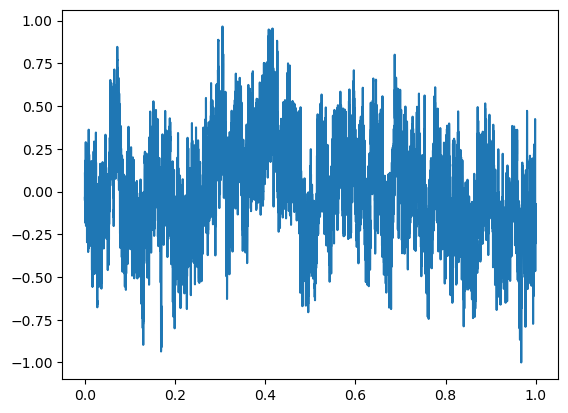

In [13]:
wave.plot()

In [14]:
wave.make_audio()

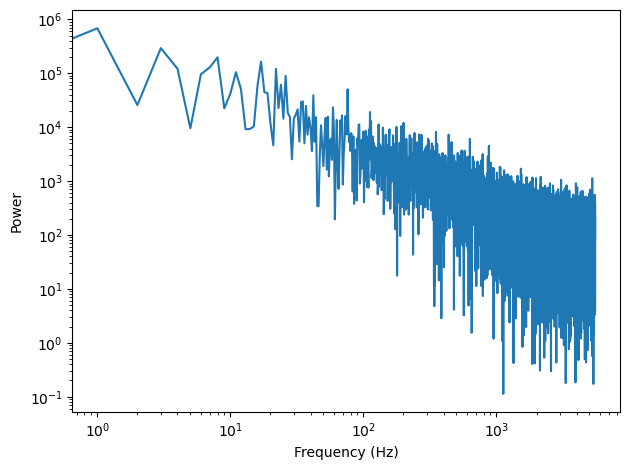

In [15]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')

decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [16]:
spectrum.estimate_slope().slope

-1.0061825079489313

In [17]:
seg_length = 64 * 1024
iters = 100
wave = Wave(voss(seg_length * iters))
len(wave)

C:\Users\cbes1\AppData\Local\Temp\ipykernel_24652\3490760828.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=0, inplace=True)


6553600

In [18]:
def bartlett_method(wave, seg_length=512, win_flag=True):
    """Estimates the power spectrum of a noise wave.
    
    wave: Wave
    seg_length: segment length
    """
    # make a spectrogram and extract the spectrums
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    
    # extract the power array from each spectrum
    psds = [spectrum.power for spectrum in spectrums]
    
    # compute the root mean power (which is like an amplitude)
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    
    # make a Spectrum with the mean amplitudes
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

In [19]:

spectrum = bartlett_method(wave, seg_length=seg_length, win_flag=False)
spectrum.hs[0] = 0
len(spectrum)

32769

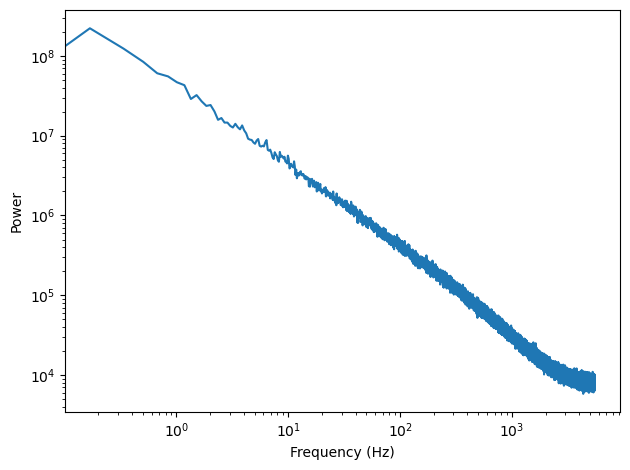

In [20]:
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

In [21]:
spectrum.estimate_slope().slope

-1.0023499301340908